In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
dhanbad_meteo = pd.read_csv('/kaggle/input/jharkhand-aqi/Jharkhand/Metrological Data/Dhanbad.csv', skiprows = 2, delimiter=',')
dhanbad_meteo

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,11.5,0.0,97,988.3,4.4,10.0,351,334
1,2024-01-01T01:00,11.5,0.0,97,989.3,3.5,8.4,336,335
2,2024-01-01T02:00,12.7,0.0,93,990.2,3.8,5.6,319,310
3,2024-01-01T03:00,15.5,0.0,82,991.1,3.1,4.6,306,309
4,2024-01-01T04:00,18.0,0.0,73,991.3,3.9,4.8,292,297
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,12.9,0.0,87,989.0,7.7,17.5,336,332
8780,2024-12-31T20:00,12.4,0.0,89,988.3,7.3,16.8,329,330
8781,2024-12-31T21:00,11.9,0.0,91,987.8,6.8,16.2,323,326
8782,2024-12-31T22:00,11.4,0.0,93,987.2,5.6,14.4,310,323


In [3]:
dhanbad_pollutants = pd.read_csv('/kaggle/input/jharkhand-aqi/Jharkhand/Pollutants/Dhanbad.csv', delimiter= ',')
dhanbad_pollutants['Timestamp'] = dhanbad_meteo['time']
dhanbad_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
dhanbad_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-01T01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-01T02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-01T03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-01T04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2024-12-30T19:00,NaN,239.08750,55.38625,236.86250,165.45250,NaN,78.67250,1.46375,18.27125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8756,2024-12-30T20:00,NaN,237.24250,55.82750,237.78750,166.22250,NaN,77.82500,1.41250,17.67000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8757,2024-12-30T21:00,NaN,186.17250,52.25750,216.19125,151.94875,NaN,74.12375,1.40750,16.70500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8758,2024-12-30T22:00,NaN,137.28625,48.57500,193.58625,136.85750,NaN,64.10625,1.32000,16.24125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dhanbad = pd.merge(dhanbad_meteo.iloc[:, :], dhanbad_pollutants.iloc[:, 0:3], on='time')
dhanbad

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,11.5,0.0,97,988.3,4.4,10.0,351,334,NaN,NaN
1,2024-01-01T01:00,11.5,0.0,97,989.3,3.5,8.4,336,335,NaN,NaN
2,2024-01-01T02:00,12.7,0.0,93,990.2,3.8,5.6,319,310,NaN,NaN
3,2024-01-01T03:00,15.5,0.0,82,991.1,3.1,4.6,306,309,NaN,NaN
4,2024-01-01T04:00,18.0,0.0,73,991.3,3.9,4.8,292,297,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8755,2024-12-30T19:00,14.8,0.0,79,990.4,6.8,15.2,343,339,NaN,239.08750
8756,2024-12-30T20:00,14.3,0.0,80,989.6,8.1,17.7,339,338,NaN,237.24250
8757,2024-12-30T21:00,13.8,0.0,82,989.2,6.8,16.2,333,334,NaN,186.17250
8758,2024-12-30T22:00,13.3,0.0,85,988.8,5.4,14.0,340,338,NaN,137.28625


In [5]:
dhanbad['city'] = 'Dhanbad'
dhanbad

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,11.5,0.0,97,988.3,4.4,10.0,351,334,NaN,NaN,Dhanbad
1,2024-01-01T01:00,11.5,0.0,97,989.3,3.5,8.4,336,335,NaN,NaN,Dhanbad
2,2024-01-01T02:00,12.7,0.0,93,990.2,3.8,5.6,319,310,NaN,NaN,Dhanbad
3,2024-01-01T03:00,15.5,0.0,82,991.1,3.1,4.6,306,309,NaN,NaN,Dhanbad
4,2024-01-01T04:00,18.0,0.0,73,991.3,3.9,4.8,292,297,NaN,NaN,Dhanbad
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2024-12-30T19:00,14.8,0.0,79,990.4,6.8,15.2,343,339,NaN,239.08750,Dhanbad
8756,2024-12-30T20:00,14.3,0.0,80,989.6,8.1,17.7,339,338,NaN,237.24250,Dhanbad
8757,2024-12-30T21:00,13.8,0.0,82,989.2,6.8,16.2,333,334,NaN,186.17250,Dhanbad
8758,2024-12-30T22:00,13.3,0.0,85,988.8,5.4,14.0,340,338,NaN,137.28625,Dhanbad


In [6]:
dhanbad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8760 non-null   object 
 1   temperature_2m (°C)       8760 non-null   float64
 2   rain (mm)                 8760 non-null   float64
 3   relative_humidity_2m (%)  8760 non-null   int64  
 4   surface_pressure (hPa)    8760 non-null   float64
 5   wind_speed_10m (km/h)     8760 non-null   float64
 6   wind_speed_100m (km/h)    8760 non-null   float64
 7   wind_direction_10m (°)    8760 non-null   int64  
 8   wind_direction_100m (°)   8760 non-null   int64  
 9   PM2.5 (µg/m³)             5095 non-null   float64
 10  PM10 (µg/m³)              4337 non-null   float64
 11  city                      8760 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 821.4+ KB


In [7]:
dhanbad = dhanbad.interpolate()
dhanbad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8760 non-null   object 
 1   temperature_2m (°C)       8760 non-null   float64
 2   rain (mm)                 8760 non-null   float64
 3   relative_humidity_2m (%)  8760 non-null   int64  
 4   surface_pressure (hPa)    8760 non-null   float64
 5   wind_speed_10m (km/h)     8760 non-null   float64
 6   wind_speed_100m (km/h)    8760 non-null   float64
 7   wind_direction_10m (°)    8760 non-null   int64  
 8   wind_direction_100m (°)   8760 non-null   int64  
 9   PM2.5 (µg/m³)             7374 non-null   float64
 10  PM10 (µg/m³)              7374 non-null   float64
 11  city                      8760 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 821.4+ KB


In [8]:
for column in dhanbad.columns:
    dhanbad[column].fillna(dhanbad[column].mode()[0], inplace=True)

dhanbad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8760 non-null   object 
 1   temperature_2m (°C)       8760 non-null   float64
 2   rain (mm)                 8760 non-null   float64
 3   relative_humidity_2m (%)  8760 non-null   int64  
 4   surface_pressure (hPa)    8760 non-null   float64
 5   wind_speed_10m (km/h)     8760 non-null   float64
 6   wind_speed_100m (km/h)    8760 non-null   float64
 7   wind_direction_10m (°)    8760 non-null   int64  
 8   wind_direction_100m (°)   8760 non-null   int64  
 9   PM2.5 (µg/m³)             8760 non-null   float64
 10  PM10 (µg/m³)              8760 non-null   float64
 11  city                      8760 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 821.4+ KB


In [9]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    dhanbad[delay1_col] = dhanbad[col].shift(1)
    delay2_col = col + "_delay2"
    dhanbad[delay2_col] = dhanbad[col].shift(2)
    dhanbad.loc[0, delay1_col] = dhanbad[col].iloc[-1]
    dhanbad.loc[1, delay2_col] = dhanbad[col].iloc[-1]
    dhanbad.loc[0, delay2_col] = dhanbad[col].iloc[-2]

dhanbad

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,11.5,0.0,97,988.3,4.4,10.0,351,334,55.37,61.42000,Dhanbad,55.37,55.37,135.24000,137.28625
1,2024-01-01T01:00,11.5,0.0,97,989.3,3.5,8.4,336,335,55.37,61.42000,Dhanbad,55.37,55.37,61.42000,135.24000
2,2024-01-01T02:00,12.7,0.0,93,990.2,3.8,5.6,319,310,55.37,61.42000,Dhanbad,55.37,55.37,61.42000,61.42000
3,2024-01-01T03:00,15.5,0.0,82,991.1,3.1,4.6,306,309,55.37,61.42000,Dhanbad,55.37,55.37,61.42000,61.42000
4,2024-01-01T04:00,18.0,0.0,73,991.3,3.9,4.8,292,297,55.37,61.42000,Dhanbad,55.37,55.37,61.42000,61.42000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2024-12-30T19:00,14.8,0.0,79,990.4,6.8,15.2,343,339,55.37,239.08750,Dhanbad,55.37,55.37,181.08250,134.93750
8756,2024-12-30T20:00,14.3,0.0,80,989.6,8.1,17.7,339,338,55.37,237.24250,Dhanbad,55.37,55.37,239.08750,181.08250
8757,2024-12-30T21:00,13.8,0.0,82,989.2,6.8,16.2,333,334,55.37,186.17250,Dhanbad,55.37,55.37,237.24250,239.08750
8758,2024-12-30T22:00,13.3,0.0,85,988.8,5.4,14.0,340,338,55.37,137.28625,Dhanbad,55.37,55.37,186.17250,237.24250


In [10]:
jharkhand_data = dhanbad

In [11]:
jharkhand_data['city'] = jharkhand_data['city'].astype('category')

In [12]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [13]:
X, y = jharkhand_data[input_cols], jharkhand_data[target_cols]

In [14]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [15]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=50,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [16]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [17]:
pred_check = model.predict(X)

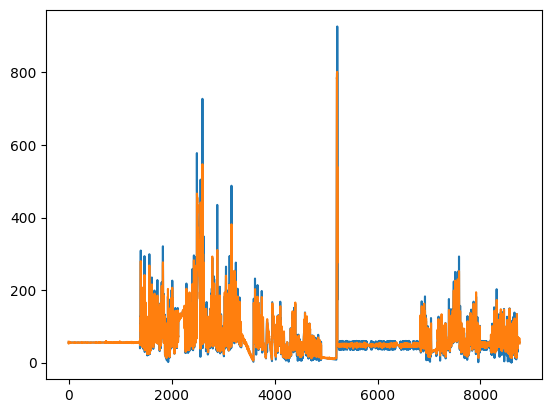

In [18]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [19]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.9289972903429833


In [20]:
import joblib
joblib.dump(model, 'Jharkhand_PM2.5_µgm³.pkl')

['Jharkhand_PM2.5_µgm³.pkl']

In [21]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
pred_check2 = model.predict(X)

In [23]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.9454128529593983


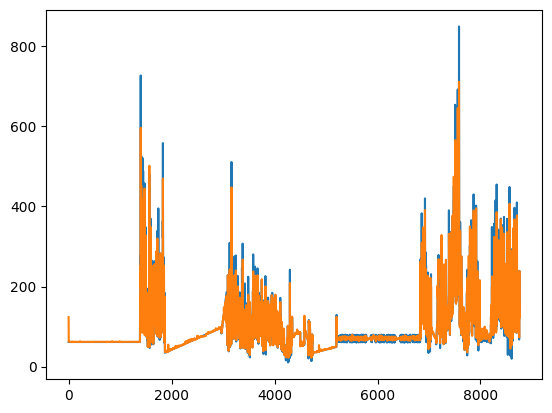

In [24]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [25]:
joblib.dump(model, 'Jharkhand_PM10_µgm³.pkl')

['Jharkhand_PM10_µgm³.pkl']